## Absence of clustering

In this notebook, we show that in the limit that the distribution of galaxies is really uniform in comoving volume, the H0 posterior is less informative.

In [1]:
from gal4H0 import *
np.random.seed(0)

true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25)
Ngal=200000 # Draw 2e5 galaxies
zdraw=np.linspace(0,1.4,1000000)
dvcdz=true_cosmology.differential_comoving_volume(zdraw).value
zgal=np.random.choice(zdraw,size=Ngal,replace=True,p=dvcdz/dvcdz.sum())
np.savetxt('mock_gal.csv',zgal)

In [2]:
LOSf=['mock_gal.csv']

sigmas=[0.1,0.2,0.3]
Ngw=1000000
zcut_rate=1.0
dl_thr=1550
H0_array=np.linspace(40,120,100)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=0)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)

    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,_,_,std_dl=draw_gw_events(200,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


mock_gal.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [1:20:23<00:00, 41.47it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 414.16it/s]
Running on GW events: 200it [01:39,  2.00it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 409.49it/s]
Running on GW events: 200it [01:37,  2.05it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 430.37it/s]
Running on GW events: 200it [01:36,  2.07it/s]


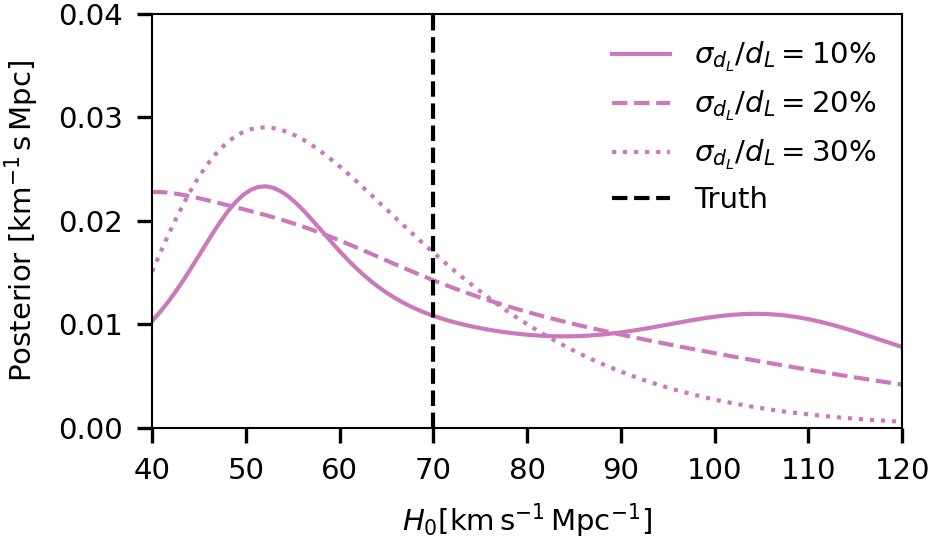

In [3]:
plt.figure(figsize=(3.3,2.0))
ilods='mock_gal.csv'
plt.plot(H0_array,posteriors[ilos+'_'+str(0.1)+'_'+'combined'],label=r'$\sigma_{d_L}/d_L=10\%$',ls='solid',color=pal[4])
plt.plot(H0_array,posteriors[ilos+'_'+str(0.2)+'_'+'combined'],label=r'$\sigma_{d_L}/d_L=20\%$',ls='--',color=pal[4])
plt.plot(H0_array,posteriors[ilos+'_'+str(0.3)+'_'+'combined'],label=r'$\sigma_{d_L}/d_L=30\%$',ls=':',color=pal[4])
plt.axvline(70.,ls='--',color='k',label='Truth')

plt.xlim([40,120])
plt.ylim([0,0.04])
plt.xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
plt.ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
plt.tight_layout()
plt.legend(frameon=False)

plt.savefig('figures_paper/big_fig_realuni.pdf')

